In [1]:
!pip install numpy opencv-python scikit-learn matplotlib seaborn


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Correct the file path using raw strings or double backslashes
data_path = r'C:\Users\nikhi\OneDrive\Desktop - Copy\Documents\Face Recognition\image'

def load_images(data_path):
    images = []
    labels = []
    label_dict = {}
    label_count = 0

    # Loop through the directories (assumes each directory is a label)
    for dir_name in os.listdir(data_path):
        dir_path = os.path.join(data_path, dir_name)
        if not os.path.isdir(dir_path):
            continue
        
        print(f"Processing directory: {dir_name}")
        label = dir_name
        label_dict[label] = label_count
        
        # Loop through the image files in the directory
        for img_name in os.listdir(dir_path):
            if img_name.endswith('.pgm'):  # Make sure it is a .pgm file
                img_path = os.path.join(dir_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Failed to load image: {img_path}")
                    continue
                
                img = cv2.resize(img, (64, 64))
                images.append(img.flatten())
                labels.append(label_count)
        
        label_count += 1

    print(f"Total images loaded: {len(images)}")
    return np.array(images), np.array(labels), label_dict

# Now call the load_images function
images, labels, label_dict = load_images(data_path)

# Normalize the pixel values
images = images / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Processing directory: s1
Processing directory: s10
Processing directory: s11
Processing directory: s12
Processing directory: s13
Processing directory: s14
Processing directory: s15
Processing directory: s16
Processing directory: s17
Processing directory: s18
Processing directory: s19
Processing directory: s2
Processing directory: s20
Processing directory: s21
Processing directory: s22
Processing directory: s23
Processing directory: s24
Processing directory: s25
Processing directory: s26
Processing directory: s27
Processing directory: s28
Processing directory: s29
Processing directory: s3
Processing directory: s30
Processing directory: s31
Processing directory: s32
Processing directory: s33
Processing directory: s34
Processing directory: s35
Processing directory: s36
Processing directory: s37
Processing directory: s38
Processing directory: s39
Processing directory: s4
Processing directory: s40
Processing directory: s5
Processing directory: s6
Processing directory: s7
Processing director

In [3]:
from sklearn.decomposition import PCA
# Define the number of principal components
n_components = 100
# Apply PCA to extract features
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Model Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         6
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.60      1.00      0.75         3
          15       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00 

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_cla

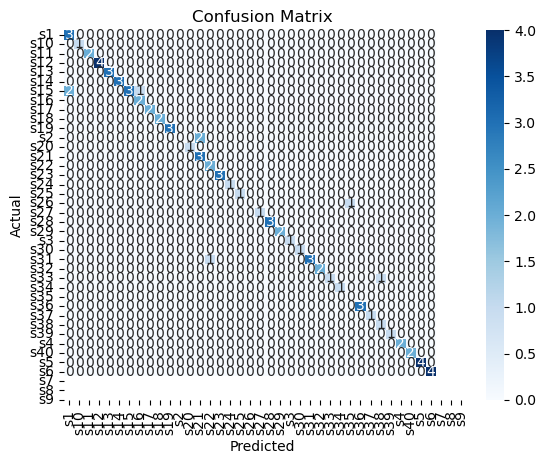

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Train the SVM classifier

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_pca, y_train)
# Make predictions
y_pred = svm.predict(X_test_pca)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.keys(),
yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

# Example data and labels
# Replace these with your actual data loading and processing
images, labels, label_dict = load_images(data_path)  # Your existing load_images function

# Normalize the pixel values
images = images / 255.0

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Train PCA and SVM
pca = PCA(n_components=50)  # Adjust the number of components based on your needs
images_pca = pca.fit_transform(images)

svm = SVC(kernel='linear', C=1)  # Example SVM model
svm.fit(images_pca, encoded_labels)

# Create the inverse label dictionary
label_dict_inv = {v: k for k, v in label_dict.items()}

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Run real-time face recognition
recognize_faces(svm, pca, face_cascade, label_dict)


Processing directory: s1
Processing directory: s10
Processing directory: s11
Processing directory: s12
Processing directory: s13
Processing directory: s14
Processing directory: s15
Processing directory: s16
Processing directory: s17
Processing directory: s18
Processing directory: s19
Processing directory: s2
Processing directory: s20
Processing directory: s21
Processing directory: s22
Processing directory: s23
Processing directory: s24
Processing directory: s25
Processing directory: s26
Processing directory: s27
Processing directory: s28
Processing directory: s29
Processing directory: s3
Processing directory: s30
Processing directory: s31
Processing directory: s32
Processing directory: s33
Processing directory: s34
Processing directory: s35
Processing directory: s36
Processing directory: s37
Processing directory: s38
Processing directory: s39
Processing directory: s4
Processing directory: s40
Processing directory: s5
Processing directory: s6
Processing directory: s7
Processing director

NameError: name 'recognize_faces' is not defined

Processing directory: s1
Processing directory: s10
Processing directory: s11
Processing directory: s12
Processing directory: s13
Processing directory: s14
Processing directory: s15
Processing directory: s16
Processing directory: s17
Processing directory: s18
Processing directory: s19
Processing directory: s2
Processing directory: s20
Processing directory: s21
Processing directory: s22
Processing directory: s23
Processing directory: s24
Processing directory: s25
Processing directory: s26
Processing directory: s27
Processing directory: s28
Processing directory: s29
Processing directory: s3
Processing directory: s30
Processing directory: s31
Processing directory: s32
Processing directory: s33
Processing directory: s34
Processing directory: s35
Processing directory: s36
Processing directory: s37
Processing directory: s38
Processing directory: s39
Processing directory: s4
Processing directory: s40
Processing directory: s5
Processing directory: s6
Processing directory: s7
Processing director

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


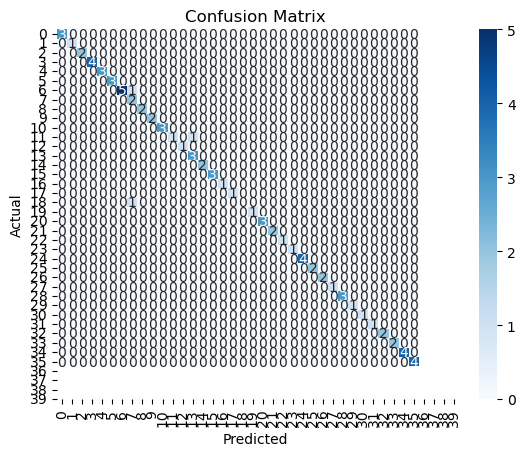

In [1]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Correct the file path using raw strings or double backslashes
data_path = r'C:\Users\nikhi\OneDrive\Desktop - Copy\Documents\Face Recognition\image'

def load_images(data_path):
    images = []
    labels = []
    label_dict = {}
    label_count = 0

    # Loop through the directories (assumes each directory is a label)
    for dir_name in os.listdir(data_path):
        dir_path = os.path.join(data_path, dir_name)
        if not os.path.isdir(dir_path):
            continue
        
        print(f"Processing directory: {dir_name}")
        label = dir_name
        label_dict[label] = label_count
        
        # Loop through the image files in the directory
        for img_name in os.listdir(dir_path):
            if img_name.endswith('.pgm'):  # Make sure it is a .pgm file
                img_path = os.path.join(dir_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Failed to load image: {img_path}")
                    continue
                
                img = cv2.resize(img, (64, 64))
                images.append(img.flatten())
                labels.append(label_count)
        
        label_count += 1

    print(f"Total images loaded: {len(images)}")
    return np.array(images), np.array(labels), label_dict

def recognize_faces(svm, pca, face_cascade, label_dict_inv):
    # Open the webcam
    cap = cv2.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (64, 64)).flatten()
            roi_gray = roi_gray / 255.0  # Normalize

            # Predict
            pca_features = pca.transform([roi_gray])
            label = svm.predict(pca_features)[0]
            label_name = label_dict_inv[label]

            # Draw rectangle around the face and label
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(frame, label_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display the resulting frame
        cv2.imshow('Face Recognition', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything is done, release the capture
    cap.release()
    cv2.destroyAllWindows()

# Load images
images, labels, label_dict = load_images(data_path)

# Normalize the pixel values
images = images / 255.0

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Apply PCA to extract features
pca = PCA(n_components=50, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create the inverse label dictionary
label_dict_inv = {v: k for k, v in label_dict.items()}

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Run real-time face recognition
recognize_faces(svm, pca, face_cascade, label_dict_inv)
